# Quick Example: FMRI Dataset

### Import plotastic and example Data

In [1]:
import plotastic as plst

# Import Example Data
DF, dims = plst.load_dataset("qpcr", verbose = False)
DF.head()

,Unnamed: 0,gene,method,fraction,subject,donor,uFC,class,FC
0,0,IFNG,MACS,F1,1,3266,0.003071,ECM & Adhesion,1.036131
1,1,IFNG,MACS,F1,3,7613,0.003005,ECM & Adhesion,1.013966
2,2,IFNG,MACS,F1,4,9721,0.002762,ECM & Adhesion,0.932101
3,3,IFNG,MACS,F1,5,9526,0.002922,ECM & Adhesion,0.986034
4,4,IFNG,MACS,F2,1,3266,0.008619,ECM & Adhesion,2.908520


#### Assign each column to a dimension (y, x, hue, col, row)

In [2]:
# dims = dict(
#     y= 'signal', 
#     x= 'timepoint',
#     hue= 'event', 
#     col= 'region',
# )

### Initialize DataAnalysis Object
- DataAnalysis will give you feedback on data
- This iobject contains every tool you need, from plotting to statistics!

In [3]:
DA = plst.DataAnalysis(
    data=DF,           # Dataframe
    dims=dims,         # Dictionary with y, x, hue, col, row 
    subject="subject", # Data is paired by subject (optional)
)

#! Checking data integrity...
❗️ DATA INCOMPLETE: Among all combinations of levels from selected factors
   ['method', 'class', 'fraction', 'gene'], groups/facets are missing in the
   Dataframe.
   👉 Call .data_get_empty_groupkeys() to see them all.
✅ GROUPS COMPLETE: No groups with NaNs.
🫠 GROUPS UNEQUAL: Groups (114 total) have different samplesizes (n = 5.2±0.89).
   👉 Call .data_get_samplesizes() to see them.
   These are the 5 groups with the largest samplesizes:
   |                                           |   FC |
   |:------------------------------------------|-----:|
   | ('Wash', 'Bone Metabolism', 'F1', 'FBN1') |    6 |
   | ('Wash', 'ECM & Adhesion', 'F1', 'CCL5')  |    6 |
   | ('Wash', 'Cytokines', 'F3', 'STAT3')      |    6 |
   | ('Wash', 'Cytokines', 'F3', 'RUNX2')      |    6 |
   | ('Wash', 'Cytokines', 'F3', 'IL6R')       |    6 |
🌳 LEVELS WELL CONNECTED: These Factors have levels that are always found
   together: ['method', 'fraction'].
   👉 Call .levels_comboc

#### Quick Preview Plot

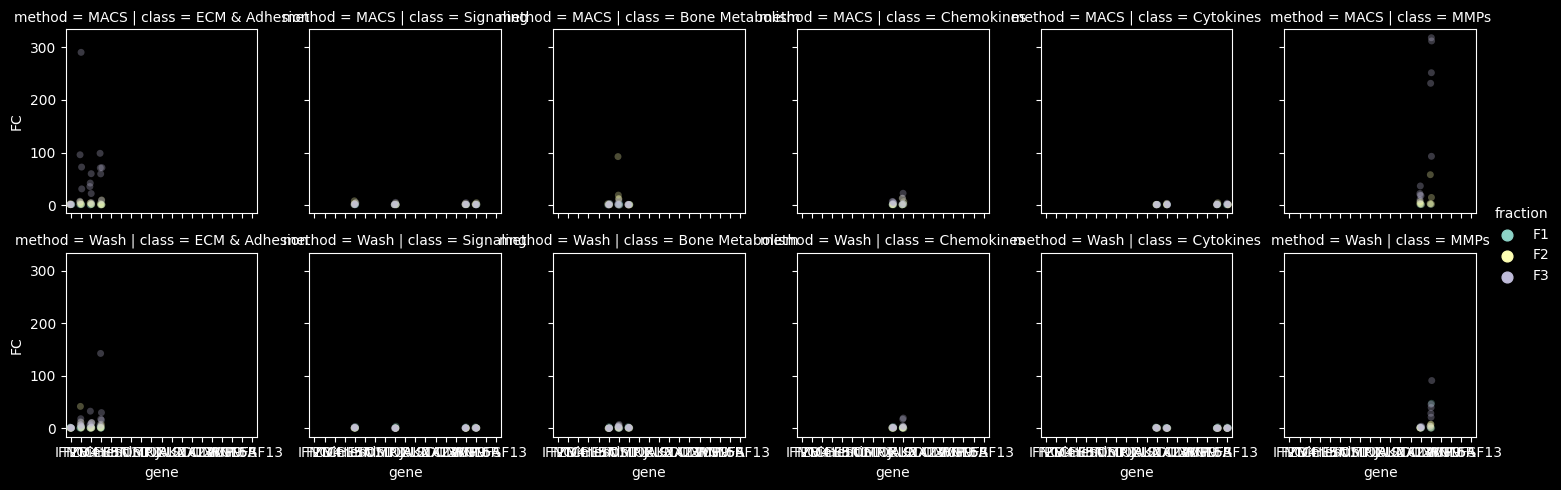

In [4]:
DA.catplot(alpha=0.3) # Works with *kwargs of seaborn.catplot()

### Perform Statistics
- No need to re-write arguments. DataAnalysis object will remember them!

#### Check Normality

In [5]:
DA.check_normality().head(20)

/Users/martinkuric/_REPOS/plotastic/venv/lib/python3.11/site-packages/pingouin/distribution.py:242: UserWarning: Group TIMP1 has less than 4 valid samples. Returning NaN.
  warnings.warn(f"Group {idx} has less than 4 valid samples. Returning NaN.")
/Users/martinkuric/_REPOS/plotastic/venv/lib/python3.11/site-packages/pingouin/distribution.py:242: UserWarning: Group CCL20 has less than 4 valid samples. Returning NaN.
  warnings.warn(f"Group {idx} has less than 4 valid samples. Returning NaN.")
/Users/martinkuric/_REPOS/plotastic/venv/lib/python3.11/site-packages/pingouin/distribution.py:242: UserWarning: Group IL2RG has less than 4 valid samples. Returning NaN.
  warnings.warn(f"Group {idx} has less than 4 valid samples. Returning NaN.")


W      pval normal  n
method class           fraction gene                                 
MACS   Bone Metabolism F1       FBN1     0.918496  0.528551   True  4
                                SOST     0.982791  0.918191   True  4
                                TIMP1         NaN       NaN  False  3
                       F2       FBN1     0.762121  0.038392  False  5
                                SOST     0.723021  0.016421  False  5
                                TIMP1    0.915237  0.499692   True  5
                       F3       FBN1     0.656790  0.003198  False  5
                                SOST     0.779319  0.054383   True  5
                                TIMP1    0.879279  0.306054   True  5
       Chemokines      F1       LOXL2    0.876003  0.321845   True  4
                                JAK2     0.932119  0.606908   True  4
                       F2       LOXL2    0.938511  0.655429   True  5
                                JAK2     0.799788  0.080712   True  5
                       F3       LOXL2    0.956825  0.785719   True  5
                                JAK2     0.809407  0.096465   True  5
       Cytokines       F1       RUNX2    0.982007  0.913690   True  4
                                STAT3    0.980178  0.903064   True  4
                                IL6R     0.986385  0.938300   True  4
                                TNFSF13  0.958736  0.770956   True  4
                       F2       RUNX2    0.987301  0.969412   True  5

#### Check Sphericity

In [6]:
DA.check_sphericity()

spher           W       chi2  dof  \
method class           fraction                                        
MACS   Bone Metabolism F1       0   True    0.532022   0.631071    2   
                       F2       0  False    0.000491  22.857355    2   
                       F3       0  False    0.034547  10.096299    2   
       Chemokines      F1       0   True         NaN        NaN    1   
                       F2       0   True         NaN        NaN    1   
                       F3       0   True         NaN        NaN    1   
       Cytokines       F1       0   True    0.095242   4.049519    5   
                       F2       0  False    0.002755  16.045762    5   
                       F3       0   True    0.040587   8.722838    5   
       ECM & Adhesion  F1       0   True    0.022251   6.553675    5   
                       F2       0   True    0.101690   3.936704    5   
                       F3       0  False    0.004277  14.848326    5   
       MMPs            F1       0   True         NaN        NaN    1   
                       F2       0   True         NaN        NaN    1   
                       F3       0   True         NaN        NaN    1   
       Signaling       F1       0   True  130.202495  -8.385657    5   
                       F2       0  False    0.001488  17.721798    5   
                       F3       0   True    0.088436   6.602688    5   
Wash   Bone Metabolism F1       0  False    0.068146  10.744390    2   
                       F2       0   True    0.462136   3.087588    2   
                       F3       0  False    0.088360   9.705334    2   
       Chemokines      F1       0   True         NaN        NaN    1   
                       F2       0   True         NaN        NaN    1   
                       F3       0   True         NaN        NaN    1   
       Cytokines       F1       0   True    0.623820   1.756495    5   
                       F2       0   True    0.135219   7.447641    5   
                       F3       0  False    0.035587  12.416467    5   
       ECM & Adhesion  F1       0   True    0.517400   2.452718    5   
                       F2       0  False    0.002031  16.875811    5   
                       F3       0  False    0.000723  26.919242    5   
       MMPs            F1       0   True         NaN        NaN    1   
                       F2       0   True         NaN        NaN    1   
                       F3       0   True         NaN        NaN    1   
       Signaling       F1       0   True    0.207410   5.855265    5   
                       F2       0   True    0.120686   7.870872    5   
                       F3       0  False    0.033229  12.671689    5   

                                       pval  group count   n per group  
method class           fraction                                         
MACS   Bone Metabolism F1       0  0.729398            3     [4, 4, 3]  
                       F2       0  0.000011            3     [5, 5, 5]  
                       F3       0  0.006421            3     [5, 5, 5]  
       Chemokines      F1       0  1.000000            2        [4, 4]  
                       F2       0  1.000000            2        [5, 5]  
                       F3       0  1.000000            2        [5, 5]  
       Cytokines       F1       0  0.600359            4  [4, 4, 4, 4]  
                       F2       0  0.010476            4  [5, 5, 5, 5]  
                       F3       0  0.142403            4  [5, 5, 5, 5]  
       ECM & Adhesion  F1       0  0.323840            4  [4, 4, 4, 4]  
                       F2       0  0.615211            4  [5, 5, 5, 4]  
                       F3       0  0.016376            4  [5, 5, 5, 5]  
       MMPs            F1       0  1.000000            2        [3, 1]  
                       F2       0  1.000000            2        [5, 5]  
                       F3       0  1.000000            2        [5, 5]  
       Signaling       F1       0  1.000000            4 

#### Repeated Measures ANOVA

In [7]:
DA.omnibus_rm_anova()

/Users/martinkuric/_REPOS/plotastic/src/plotastic/stat/omnibus.py:163: RuntimeWarning: Skipping facet ('MACS', 'MMPs'), because there is only one sample in ('IL2RG', 'F1')
  rmaov = self._omnibus_rm_anova_base(df, facetkey=key, **kwargs)


Source            SS  ddof1  ddof2  \
method class                                                            
MACS   ECM & Adhesion  0             gene  10069.727795      3      6   
                       1         fraction  18621.498711      2      4   
                       2  gene * fraction  19134.762676      6     12   
       Signaling       0             gene      7.144501      3      9   
                       1         fraction     16.769028      2      6   
                       2  gene * fraction      9.415333      6     18   
       Bone Metabolism 0             gene     76.137915      2      4   
                       1         fraction     51.636260      2      4   
                       2  gene * fraction    124.377543      4      8   
       Chemokines      0             gene     15.573492      1      3   
                       1         fraction     48.678852      2      6   
                       2  gene * fraction     18.156028      2      6   
       Cytokines       0             gene      0.881284      3      9   
                       1         fraction      1.095785      2      6   
                       2  gene * fraction      3.512209      6     18   
       MMPs            0             gene   7505.120815      1      0   
                       1         fraction  20080.013742      2      0   
                       2  gene * fraction  15327.527936      2      0   
Wash   ECM & Adhesion  0             gene   1722.619221      3     12   
                       1         fraction   2668.437755      2      8   
                       2  gene * fraction   3576.722921      6     24   
       Signaling       0             gene      2.438072      3     15   
                       1         fraction      7.250306      2     10   
                       2  gene * fraction      3.249658      6     30   
       Bone Metabolism 0             gene     22.993870      2     10   
                       1         fraction      6.494392      2     10   
                       2  gene * fraction     19.857904      4     20   
       Chemokines      0             gene     44.551175      1      5   
                       1         fraction    122.053577      2     10   
                       2  gene * fraction     95.878915      2     10   
       Cytokines       0             gene      1.731197      3     15   
                       1         fraction      6.371780      2     10   
                       2  gene * fraction      0.390234      6     30   
       MMPs            0             gene   2833.186518      1      2   
                       1         fraction   2559.193757      2      4   
                       2  gene * fraction   2224.359931      2      4   

                                    MS          F     p-unc  stars  p-GG-corr  \
method class                                                                    
MACS   ECM & Adhesion  0   3356.575932   2.172959  0.192261     ns   0.276814   
                       1   9310.749356   3.248162  0.145226     ns   0.213287   
                       2   3189.127113   2.004487  0.143797     ns   0.368468   
       Signaling       0      2.381500   6.660855  0.011572      *   0.075965   
                       1      8.384514   1.910051  0.228090     ns   0.258184   
                       2      1.569222   4.009457  0.010057      *   0.180850   
       Bone Metabolism 0     38.068958   2.937341  0.164087     ns   0.225210   
                       1     25.818130   3.193020  0.148327     ns   0.215846   
                       2     31.094386   3.480549  0.062786  0.063   0.302185   
       Chemokines      0     15.573492   0.626293  0.486516     ns   0.486516   
                       1     24.339426   3.571582  0.095138     ns   0.138104   
                       2      9.078014   0.967185  0.432431     ns   0.411034   
       Cytokines       0      0.293761   0.705839  0.572231     ns   0.477795   
                       1      0.547893   0.34

#### Post-hoc t-tests

In [8]:
DA.test_pairwise()

gene      A      B  \
method class          fraction Contrast                               
MACS   ECM & Adhesion -        gene                 -   CCL5   FZD4   
                               gene                 -   CCL5   IFNG   
                               gene                 -   CCL5  PTCH1   
                               gene                 -   FZD4   IFNG   
                               gene                 -   FZD4  PTCH1   
...                                               ...    ...    ...   
Wash   MMPs           NaN      gene * fraction  IL2RG     F1     F3   
                               gene * fraction  IL2RG     F2     F3   
                      F1       fraction * gene    NaN  CCL20  IL2RG   
                      F2       fraction * gene    NaN  CCL20  IL2RG   
                      F3       fraction * gene    NaN  CCL20  IL2RG   

                                                  mean(A)     std(A)  \
method class          fraction Contrast                                
MACS   ECM & Adhesion -        gene             25.111871  15.441466   
                               gene             25.111871  15.441466   
                               gene             25.111871  15.441466   
                               gene             37.001943  36.675082   
                               gene             37.001943  36.675082   
...                                                   ...        ...   
Wash   MMPs           NaN      gene * fraction  12.489809  23.463872   
                               gene * fraction   4.861697   3.017675   
                      F1       fraction * gene   1.124032   0.603108   
                      F2       fraction * gene   0.898533   0.276159   
                      F3       fraction * gene   2.220266   1.228160   

                                                  mean(B)     std(B) Paired  \
method class          fraction Contrast                                       
MACS   ECM & Adhesion -        gene             37.001943  36.675082   True   
                               gene              1.258040   0.259172   True   
                               gene             15.235811  10.545578   True   
                               gene              1.258040   0.259172   True   
                               gene             15.235811  10.545578   True   
...                                                   ...        ...    ...   
Wash   MMPs           NaN      gene * fraction  38.359986  29.709778   True   
                               gene * fraction  38.359986  29.709778   True   
                      F1       fraction * gene  12.489809  23.463872   True   
                      F2       fraction * gene   4.861697   3.017675   True   
                      F3       fraction * gene  38.359986  29.709778   True   

                                                Parametric         T  dof  \
method class          fraction Contrast                                     
MACS   ECM & Adhesion -        gene                   True -0.740277  4.0   
                               gene                   True  3.485834  4.0   
                               gene                   True  3.112704  4.0   
                               gene                   True  2.187027  4.0   
                               gene                   True  1.248789  4.0   
...                                                    ...       ...  ...   
Wash   MMPs           NaN      gene * fraction        True -1.773759  3.0   
                               gene * fraction        True -2.655836  4.0   
                      F1       fraction * gene        True -0.991688  3.0   
                      F2       fraction * gene        True -3.095049  4.0   
                      F3       fraction * gene        True -3.086481  5.0   

                                               alternative     p-unc   BF10  \
method class          fraction Contrast                                       


#### Save Results
Output is one excel file containing results of all performed tests (normality, anova,
t-tests, etc.) in different sheets

In [9]:
DA.save_statistics(fname="quick_example_fmri_files/example.png", 
                   overwrite="day" # Adds the current dfate to filename as an overwrite protection, All options: TRUE, "day" or "nothing"
                   )

### Make a Pretty Plot with Statistical Annotations in Few Lines!


#### Use matplotlib styles (optional)

In [10]:
from matplotlib import pyplot as plt
plt.rcdefaults()        # Reset rc to default
plt.style.use('ggplot') # Set styles as you're used to'

#### Chain multiple commands for plotting:

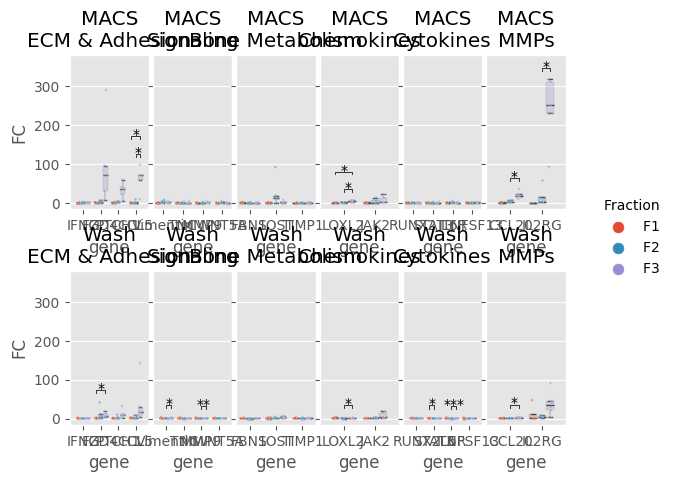

In [11]:
(DA
 .plot_box_strip()   # Use a pre-built plotting function to initialize and draw the plot
 .annotate_pairwise( # Place results calculated previously (DA.test_pairwise()) on the plot
     include="__HUE" # Only annotate significant pairs across each hue, not within hue
     ) 
)

# Saving the plot requires 
plt.savefig(fname="quick_example_fmri_files/example.png", 
            dpi=200, 
            bbox_inches="tight",)